In [57]:
# import pandas as pd for data manipulation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

df = pd.read_csv('heart_2020_cleaned.csv')
df_org = df.copy() # make a copy of the original data frame
display(df)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [58]:
# retrieve all labels and store in a list
columns_df = list(df.columns.values)
# iterate over the list to print all unique values of each column in the dataframe
for column in columns_df:
    print(column, ':', str(df[column].unique()))

HeartDisease : ['No' 'Yes']
BMI : [16.6  20.34 26.58 ... 62.42 51.46 46.56]
Smoking : ['Yes' 'No']
AlcoholDrinking : ['No' 'Yes']
Stroke : ['No' 'Yes']
PhysicalHealth : [ 3.  0. 20. 28.  6. 15.  5. 30.  7.  1.  2. 21.  4. 10. 14. 18.  8. 25.
 16. 29. 27. 17. 24. 12. 23. 26. 22. 19.  9. 13. 11.]
MentalHealth : [30.  0.  2.  5. 15.  8.  4.  3. 10. 14. 20.  1.  7. 24.  9. 28. 16. 12.
  6. 25. 17. 18. 21. 29. 22. 13. 23. 27. 26. 11. 19.]
DiffWalking : ['No' 'Yes']
Sex : ['Female' 'Male']
AgeCategory : ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
Race : ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
Diabetic : ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
PhysicalActivity : ['Yes' 'No']
GenHealth : ['Very good' 'Fair' 'Good' 'Poor' 'Excellent']
SleepTime : [ 5.  7.  8.  6. 12.  4.  9. 10. 15.  3.  2.  1. 16. 18. 14. 20. 11. 13.
 17. 24. 19. 21. 22. 23.]
Asthma : ['Yes' 'No']

In [59]:
# import numpy for array operations and select all numerical columns
import numpy as np

In [60]:
# list of numerical features
numeric_features = df.select_dtypes(include=[np.number])
numeric_features.columns

Index(['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime'], dtype='object')

In [61]:
# list of categorical features
categorical_features = df.select_dtypes(include=[object])
categorical_features.columns

Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [62]:
# encode 'AgeCategory' column
encode_AgeCategory = {'55-59':57, '80 or older':80, '65-69':67,
                      '75-79':77,'40-44':42,'70-74':72,'60-64':62,
                      '50-54':52,'45-49':47,'18-24':21,'35-39':37,
                      '30-34':32,'25-29':27}
df['AgeCategory'] = df['AgeCategory'].apply(lambda x: encode_AgeCategory[x])
df['AgeCategory'] = df['AgeCategory'].astype(int)
df['AgeCategory']

0         57
1         80
2         67
3         77
4         42
          ..
319790    62
319791    37
319792    47
319793    27
319794    80
Name: AgeCategory, Length: 319795, dtype: int32

In [63]:
# Generate descriptive statistics
df.describe()[1:][list(numeric_features)].T.style.background_gradient(cmap='Blues')

,mean,std,min,25%,50%,75%,max
BMI,28.325399,6.356100,12.020000,24.030000,27.340000,31.420000,94.850000
PhysicalHealth,3.371710,7.950850,0.000000,0.000000,0.000000,2.000000,30.000000
MentalHealth,3.898366,7.955235,0.000000,0.000000,0.000000,3.000000,30.000000
SleepTime,7.097075,1.436007,1.000000,6.000000,7.000000,8.000000,24.000000


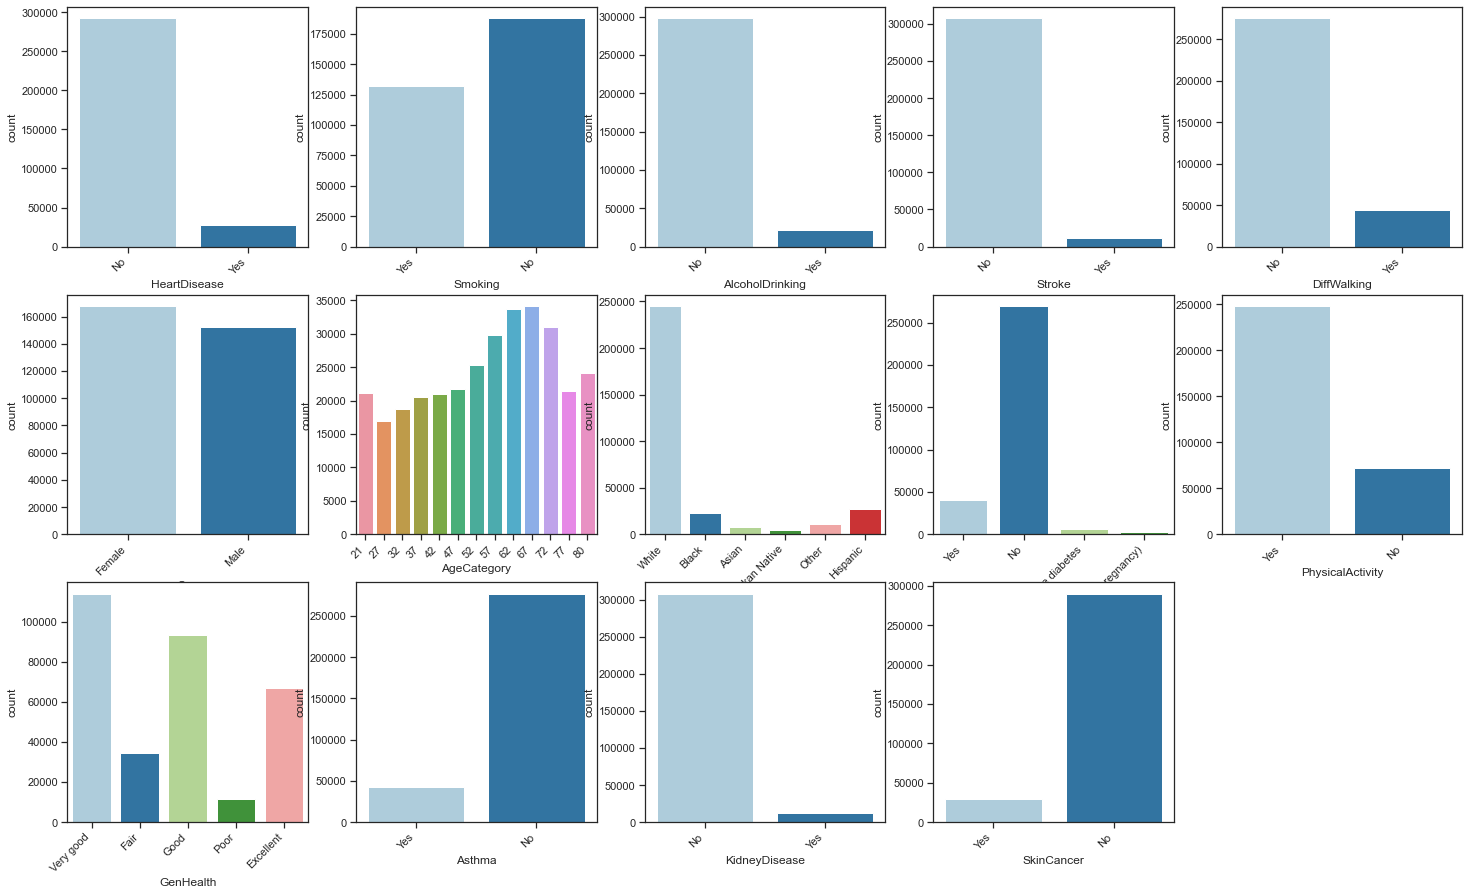

In [64]:
# import matplotlib and seaborn for visualization
from matplotlib import pyplot as plt
import seaborn as sns

# Univariate visualization of categorical features
def categorical_feature_func():
  i = 1
  plt.figure(figsize = (25,15))
  for feature in categorical_features:
      plt.subplot(3,5,i)
      sns.set(palette='Paired')
      sns.set_style("ticks")
      ax = sns.countplot(x = feature, data = df)#, hue = 'Stroke')#, color='#221C35')
      ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
      i +=1

categorical_feature_func()

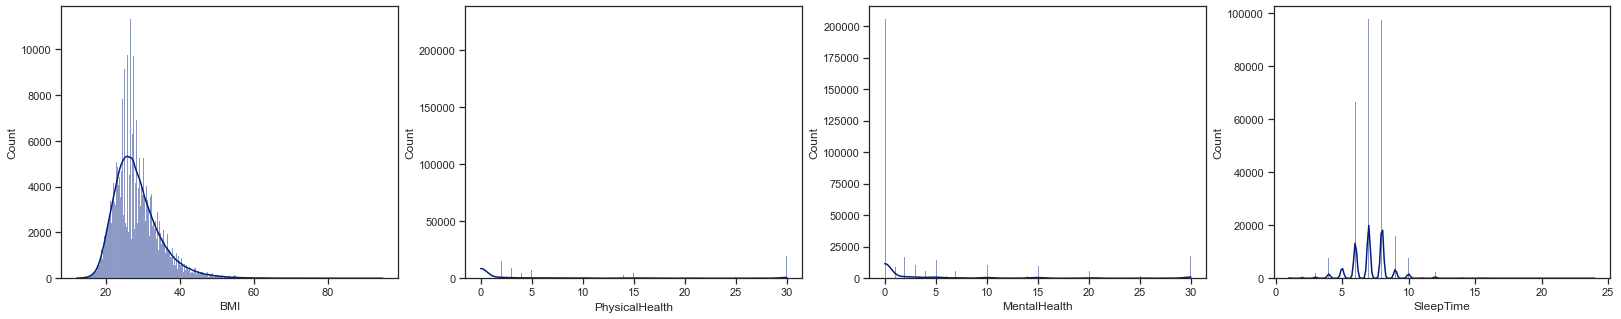

In [65]:
# Univariate visualization of numerical features
def numeric_features_func():
  i=1
  plt.figure(figsize = (35,5))
  for feature in numeric_features.columns:
      plt.subplot(1,5,i)
      sns.set(palette='dark')
      sns.set_style("ticks")
      sns.histplot(df[feature],kde=True)
      plt.xlabel(feature)
      plt.ylabel("Count")
      i+=1

numeric_features_func()

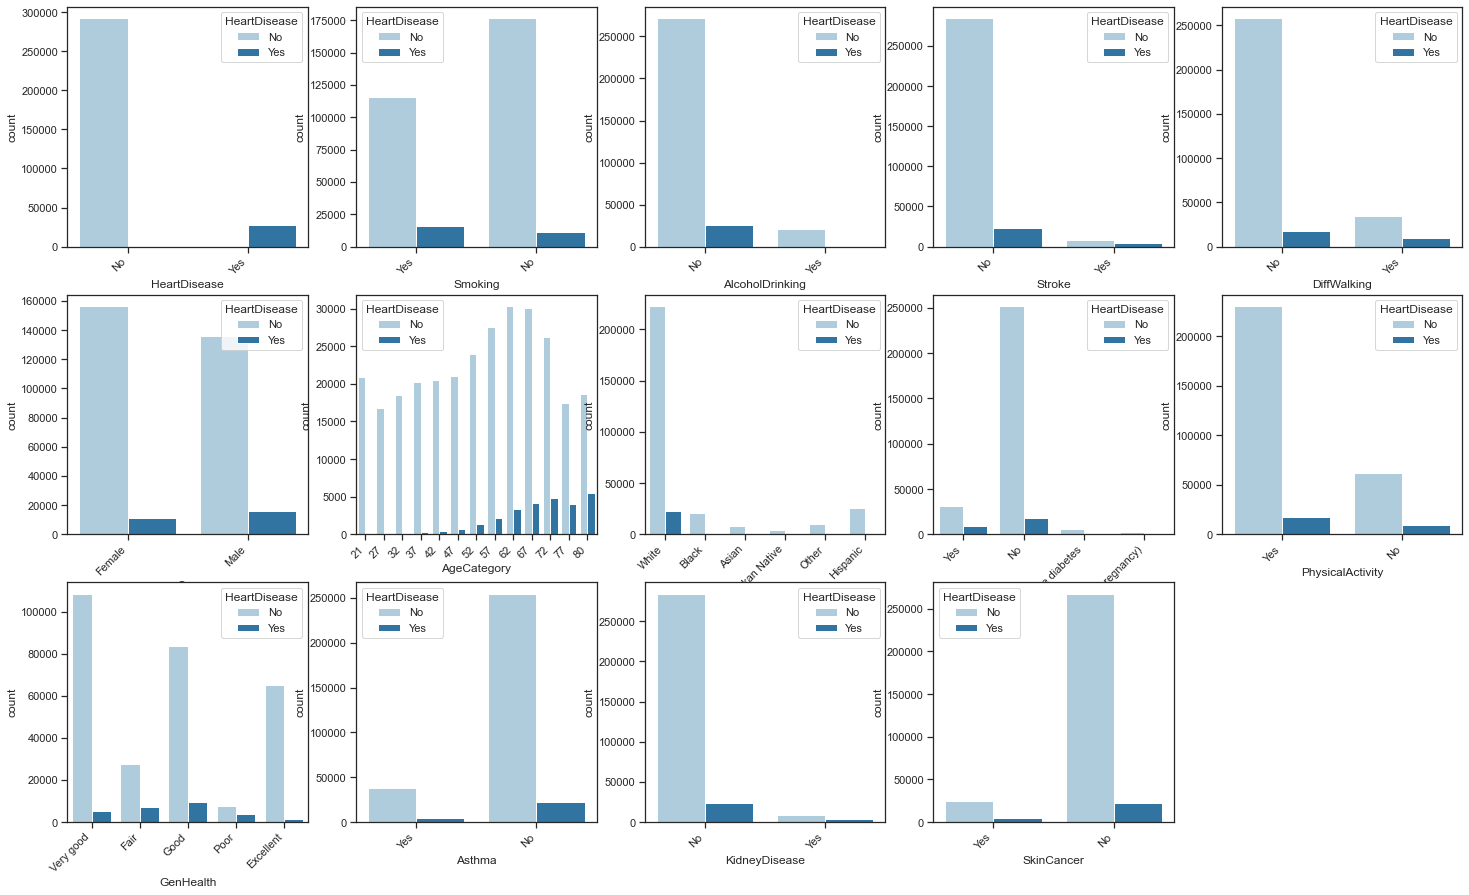

In [66]:
def categorical_feature_func():
  i = 1
  plt.figure(figsize = (25,15))
  for feature in categorical_features:
      plt.subplot(3,5,i)
      sns.set(palette='Paired')
      sns.set_style("ticks")
      ax = sns.countplot(x = feature, data = df, hue = 'HeartDisease')
      ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
      i +=1

categorical_feature_func()

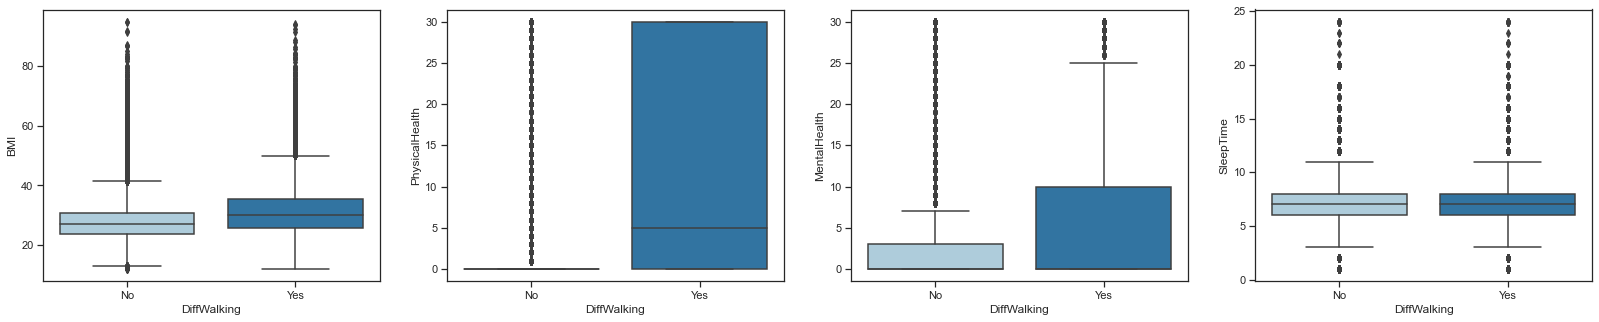

In [67]:
def numeric_features_func(f):
  i=1
  plt.figure(figsize=(35,5))
  sns.set(palette='Paired')
  sns.set_style("ticks")
  for feature in numeric_features:
      plt.subplot(1,5,i)
      sns.boxplot(y=df[feature], x = df[f])
      i+=1

numeric_features_func('DiffWalking')

In [68]:
# Encode all columns
columns_df = list(df.columns.values)
from sklearn.preprocessing import LabelEncoder

cat_cols = ["Smoking", "AlcoholDrinking", "Stroke", "DiffWalking",
                "Sex", "AgeCategory", "Race", "Diabetic", "PhysicalActivity",
                "GenHealth", "Asthma", "KidneyDisease", "SkinCancer"]
for cat_col in cat_cols:
    dummy_col = pd.get_dummies(df[cat_col], prefix=cat_col)
    df = pd.concat([df, dummy_col], axis=1)
    del df[cat_col]

for col in ['HeartDisease']:
    if df[col].dtype == 'O':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])


df.head()

,HeartDisease,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Stroke_No,...,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
0,0,16.60,3.0,30.0,5.0,0,1,1,0,1,...,0,0,0,1,0,1,1,0,0,1
1,0,20.34,0.0,0.0,7.0,1,0,1,0,0,...,0,0,0,1,1,0,1,0,1,0
2,0,26.58,20.0,30.0,8.0,0,1,1,0,1,...,1,0,0,0,0,1,1,0,1,0
3,0,24.21,0.0,0.0,6.0,1,0,1,0,1,...,0,1,0,0,1,0,1,0,0,1
4,0,23.71,28.0,0.0,8.0,1,0,1,0,1,...,0,0,0,1,1,0,1,0,1,0


In [69]:
# copied original dataframe to new dataframe for new encoding methods
df_enc_mix = df_org.copy()

In [70]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Define a LabelEncoder
le = LabelEncoder()

# Get a list of categorical column names
categorical_cols = df_enc_mix.select_dtypes(include=['object', 'category']).columns.tolist()

# mix of label encoding and one-hot encoding
for col in categorical_cols:
    if len(df_enc_mix[col].unique()) <= 2:
        # label encode binary variables
        df_enc_mix[col] = le.fit_transform(df_enc_mix[col])
    else:
        # one-hot encode non-binary variables
        df_enc_mix = pd.get_dummies(df_enc_mix, columns=[col])

df_enc_mix.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,PhysicalActivity,...,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,0,16.60,1,0,0,3.0,30.0,0,0,1,...,1,0,0,1,0,0,0,0,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,1,...,1,1,0,0,0,0,0,0,0,1
2,0,26.58,1,0,0,20.0,30.0,0,1,1,...,1,0,0,1,0,0,1,0,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,0,...,1,1,0,0,0,0,0,1,0,0
4,0,23.71,0,0,0,28.0,0.0,1,0,1,...,1,1,0,0,0,0,0,0,0,1


In [71]:
# iterate over the list to print all unique values of each column in the dataframe
for column in list(df.columns.values):
    print(column, ':', str(df[column].unique()))

HeartDisease : [0 1]
BMI : [16.6  20.34 26.58 ... 62.42 51.46 46.56]
PhysicalHealth : [ 3.  0. 20. 28.  6. 15.  5. 30.  7.  1.  2. 21.  4. 10. 14. 18.  8. 25.
 16. 29. 27. 17. 24. 12. 23. 26. 22. 19.  9. 13. 11.]
MentalHealth : [30.  0.  2.  5. 15.  8.  4.  3. 10. 14. 20.  1.  7. 24.  9. 28. 16. 12.
  6. 25. 17. 18. 21. 29. 22. 13. 23. 27. 26. 11. 19.]
SleepTime : [ 5.  7.  8.  6. 12.  4.  9. 10. 15.  3.  2.  1. 16. 18. 14. 20. 11. 13.
 17. 24. 19. 21. 22. 23.]
Smoking_No : [0 1]
Smoking_Yes : [1 0]
AlcoholDrinking_No : [1 0]
AlcoholDrinking_Yes : [0 1]
Stroke_No : [1 0]
Stroke_Yes : [0 1]
DiffWalking_No : [1 0]
DiffWalking_Yes : [0 1]
Sex_Female : [1 0]
Sex_Male : [0 1]
AgeCategory_21 : [0 1]
AgeCategory_27 : [0 1]
AgeCategory_32 : [0 1]
AgeCategory_37 : [0 1]
AgeCategory_42 : [0 1]
AgeCategory_47 : [0 1]
AgeCategory_52 : [0 1]
AgeCategory_57 : [1 0]
AgeCategory_62 : [0 1]
AgeCategory_67 : [0 1]
AgeCategory_72 : [0 1]
AgeCategory_77 : [0 1]
AgeCategory_80 : [0 1]
Race_American Indian/

In [72]:
# iterate over the list to print all unique values of each column in the dataframe
for column in list(df_enc_mix.columns.values):
    print(column, ':', str(df_enc_mix[column].unique()))

HeartDisease : [0 1]
BMI : [16.6  20.34 26.58 ... 62.42 51.46 46.56]
Smoking : [1 0]
AlcoholDrinking : [0 1]
Stroke : [0 1]
PhysicalHealth : [ 3.  0. 20. 28.  6. 15.  5. 30.  7.  1.  2. 21.  4. 10. 14. 18.  8. 25.
 16. 29. 27. 17. 24. 12. 23. 26. 22. 19.  9. 13. 11.]
MentalHealth : [30.  0.  2.  5. 15.  8.  4.  3. 10. 14. 20.  1.  7. 24.  9. 28. 16. 12.
  6. 25. 17. 18. 21. 29. 22. 13. 23. 27. 26. 11. 19.]
DiffWalking : [0 1]
Sex : [0 1]
PhysicalActivity : [1 0]
SleepTime : [ 5.  7.  8.  6. 12.  4.  9. 10. 15.  3.  2.  1. 16. 18. 14. 20. 11. 13.
 17. 24. 19. 21. 22. 23.]
Asthma : [1 0]
KidneyDisease : [0 1]
SkinCancer : [1 0]
AgeCategory_18-24 : [0 1]
AgeCategory_25-29 : [0 1]
AgeCategory_30-34 : [0 1]
AgeCategory_35-39 : [0 1]
AgeCategory_40-44 : [0 1]
AgeCategory_45-49 : [0 1]
AgeCategory_50-54 : [0 1]
AgeCategory_55-59 : [1 0]
AgeCategory_60-64 : [0 1]
AgeCategory_65-69 : [0 1]
AgeCategory_70-74 : [0 1]
AgeCategory_75-79 : [0 1]
AgeCategory_80 or older : [0 1]
Race_American Indian/A

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
# split the dataset into train and test set with 80% and 20% respectively
train_data, test_data = train_test_split(df, train_size=0.80)
train_data.shape, test_data.shape

((255836, 51), (63959, 51))

In [75]:
# split the dataset into train and test set for NEW encoding method
train_data_label, test_data_label = train_test_split(df_enc_mix, train_size=0.80)
train_data_label.shape, test_data_label.shape

((255836, 42), (63959, 42))

In [76]:
# split the train and test set into features and labels
X_train= train_data.drop('HeartDisease', axis=1)
y_train= train_data['HeartDisease']
print(X_train.shape, y_train.shape)

X_test= test_data.drop('HeartDisease', axis=1)
y_test= test_data['HeartDisease']
print(X_test.shape, y_test.shape)

(255836, 50) (255836,)
(63959, 50) (63959,)


In [77]:
# split the train and test set for the NEW encoding method
X_train_new= train_data_label.drop('HeartDisease', axis=1)
y_train_new= train_data_label['HeartDisease']
print(X_train_new.shape, y_train_new.shape)

X_test_new= test_data_label.drop('HeartDisease', axis=1)
y_test_new= test_data_label['HeartDisease']
print(X_test_new.shape, y_test_new.shape)

(255836, 41) (255836,)
(63959, 41) (63959,)


In [78]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
# there is no data-leakage because we are using
# information of train in test not test in train
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# for NEW encoding method
X_train_new=sc.fit_transform(X_train_new)
X_test_new=sc.transform(X_test_new)

In [79]:
# X_train after scaling
X_train

array([[ 0.06838023, -0.17274243, -0.48977135, ..., -0.19549836,
         0.32083687, -0.32083687],
       [-0.02141021,  3.34900115,  0.89423086, ..., -0.19549836,
         0.32083687, -0.32083687],
       [-0.26715247, -0.42429554,  0.13932056, ..., -0.19549836,
         0.32083687, -0.32083687],
       ...,
       [ 0.45117106, -0.42429554, -0.48977135, ..., -0.19549836,
         0.32083687, -0.32083687],
       [-0.6231637 , -0.42429554, -0.48977135, ...,  5.1151323 ,
         0.32083687, -0.32083687],
       [-0.73973374, -0.42429554, -0.48977135, ..., -0.19549836,
         0.32083687, -0.32083687]])

In [80]:
# X_train_new after scaling
X_train_new

array([[ 1.38356496, -0.83747555, -0.26999826, ...,  1.559329  ,
        -0.19128942, -0.74340924],
       [-0.16369548,  1.19406472, -0.26999826, ...,  1.559329  ,
        -0.19128942, -0.74340924],
       [-0.29591306,  1.19406472,  3.70372753, ...,  1.559329  ,
        -0.19128942, -0.74340924],
       ...,
       [-0.1400852 , -0.83747555, -0.26999826, ..., -0.64130148,
        -0.19128942,  1.34515412],
       [-0.92394655,  1.19406472,  3.70372753, ..., -0.64130148,
        -0.19128942, -0.74340924],
       [-0.26758072, -0.83747555, -0.26999826, ...,  1.559329  ,
        -0.19128942, -0.74340924]])

In [81]:
df['HeartDisease'].value_counts()

0    292422
1     27373
Name: HeartDisease, dtype: int64

In [82]:
df_enc_mix['HeartDisease'].value_counts()


0    292422
1     27373
Name: HeartDisease, dtype: int64

In [83]:
# import SMOTE from imblearn.over_sampling
from imblearn.over_sampling import SMOTE

In [84]:
# import NearMiss from imblearn.under_sampling
from imblearn.under_sampling import NearMiss

In [85]:
# Counter is a collection where elements are stored as
# dictionary keys and their counts are stored as dictionary values.
from collections import Counter

In [86]:
# balance the dataset using SMOTE (Synthetic Minority Oversampling Technique)
smote = SMOTE(sampling_strategy='minority')
X_train_smote , y_train_smote = smote.fit_resample(X_train,y_train)

print('Original: {}'.format(Counter(y_train)))
print('   SMOTE: {}'.format(Counter(y_train_smote)))

Original: Counter({0: 233877, 1: 21959})
   SMOTE: Counter({0: 233877, 1: 233877})


In [87]:
# SMOTE: NEW encoding method
X_train_smote_new , y_train_smote_new = smote.fit_resample(X_train_new,y_train_new)

print('Original: {}'.format(Counter(y_train_new)))
print('  SMOTE2: {}'.format(Counter(y_train_smote_new)))

Original: Counter({0: 233904, 1: 21932})
  SMOTE2: Counter({0: 233904, 1: 233904})


In [88]:
# balance the dataset using NearMiss (undersampling)
nearmiss = NearMiss(version=3)
X_train_nearmiss, y_train_nearmiss = nearmiss.fit_resample(X_train, y_train)

print('Original: {}'.format(Counter(y_train)))
print('NearMiss: {}'.format(Counter(y_train_nearmiss)))

Original: Counter({0: 233877, 1: 21959})
NearMiss: Counter({0: 21959, 1: 21959})


In [89]:
# NearMiss: NEW encoding method
X_train_nearmiss_new, y_train_nearmiss_new = nearmiss.fit_resample(X_train_new, y_train_new)

print(' Original: {}'.format(Counter(y_train_new)))
print('NearMiss2: {}'.format(Counter(y_train_nearmiss_new)))

 Original: Counter({0: 233904, 1: 21932})
NearMiss2: Counter({0: 21932, 1: 21932})


In [90]:
# kfold cross validation
from sklearn.model_selection import KFold

# make a 10 fold cross validation
cv = KFold(n_splits=10, random_state=None,shuffle=False)

In [91]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import auc, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

In [92]:
# make the model and parameters
def dt_model():
    model_dt = DecisionTreeClassifier()
    params_dt = {"criterion":['gini','entropy'], "max_depth": [100], "random_state": [1024]}
    model_dt_cv = GridSearchCV( model_dt,
                                param_grid = params_dt,
                                cv = cv,
                                n_jobs = -1,
                                verbose = 1 )
    return model_dt_cv

In [93]:
# fit the model with the best hyperparameters using SMOTE
model_dt_cv_smote = dt_model()
model_dt_cv_smote.fit(X_train_smote ,y_train_smote)
print("Best Hyper Parameters for SMOTE: ", model_dt_cv_smote.best_params_)

Fitting 10 folds for each of 2 candidates, totalling 20 fits
Best Hyper Parameters for SMOTE:  {'criterion': 'entropy', 'max_depth': 100, 'random_state': 1024}


In [94]:
# fit the model for NEW encoding method - SMOTE
model_dt_cv_smote_new = dt_model()
model_dt_cv_smote_new.fit(X_train_smote_new ,y_train_smote_new)
print("Best Hyper Parameters for SMOTE2: ", model_dt_cv_smote_new.best_params_)

Fitting 10 folds for each of 2 candidates, totalling 20 fits
Best Hyper Parameters for SMOTE2:  {'criterion': 'entropy', 'max_depth': 100, 'random_state': 1024}


In [95]:
# fit the model with the best hyperparameters using NearMiss
model_dt_cv_nearmiss = dt_model()
model_dt_cv_nearmiss.fit(X_train_nearmiss ,y_train_nearmiss)
print("Best Hyper Parameters for NearMiss: ", model_dt_cv_nearmiss.best_params_)

Fitting 10 folds for each of 2 candidates, totalling 20 fits
Best Hyper Parameters for NearMiss:  {'criterion': 'gini', 'max_depth': 100, 'random_state': 1024}


In [96]:
# fit the model for New encoding method - NearMiss
model_dt_cv_nearmiss_new = dt_model()
model_dt_cv_nearmiss_new.fit(X_train_nearmiss_new ,y_train_nearmiss_new)
print("Best Hyper Parameters for NearMiss2: ", model_dt_cv_nearmiss_new.best_params_)

Fitting 10 folds for each of 2 candidates, totalling 20 fits
Best Hyper Parameters for NearMiss2:  {'criterion': 'gini', 'max_depth': 100, 'random_state': 1024}


In [97]:
# print the best score (SMOTE)
y_pred_dt_smote = model_dt_cv_smote.predict(X_test)
print("Classification Report for SMOTE: \n", classification_report(y_test, y_pred_dt_smote))

Classification Report for SMOTE: 
               precision    recall  f1-score   support

           0       0.93      0.90      0.92     58545
           1       0.21      0.29      0.24      5414

    accuracy                           0.85     63959
   macro avg       0.57      0.59      0.58     63959
weighted avg       0.87      0.85      0.86     63959



In [98]:
# print the best score (SMOTE) New encoding method
y_pred_dt_smote_new = model_dt_cv_smote_new.predict(X_test_new)
print("Classification Report for SMOTE2: \n", classification_report(y_test_new, y_pred_dt_smote_new))

Classification Report for SMOTE2: 
               precision    recall  f1-score   support

           0       0.93      0.90      0.91     58518
           1       0.21      0.30      0.25      5441

    accuracy                           0.85     63959
   macro avg       0.57      0.60      0.58     63959
weighted avg       0.87      0.85      0.86     63959



In [99]:
# print the best score (NearMiss)
y_pred_dt_nearmiss = model_dt_cv_nearmiss.predict(X_test)
print("Classification Report for NearMiss: \n", classification_report(y_test, y_pred_dt_nearmiss))

Classification Report for NearMiss: 
               precision    recall  f1-score   support

           0       0.92      0.42      0.57     58545
           1       0.09      0.62      0.16      5414

    accuracy                           0.43     63959
   macro avg       0.51      0.52      0.36     63959
weighted avg       0.85      0.43      0.54     63959



In [100]:
# print the best score (NearMiss) New encoding method
y_pred_dt_nearmiss_new = model_dt_cv_nearmiss_new.predict(X_test_new)
print("Classification Report for NearMiss2: \n", classification_report(y_test_new, y_pred_dt_nearmiss_new))

Classification Report for NearMiss2: 
               precision    recall  f1-score   support

           0       0.92      0.39      0.55     58518
           1       0.09      0.61      0.15      5441

    accuracy                           0.41     63959
   macro avg       0.50      0.50      0.35     63959
weighted avg       0.84      0.41      0.51     63959



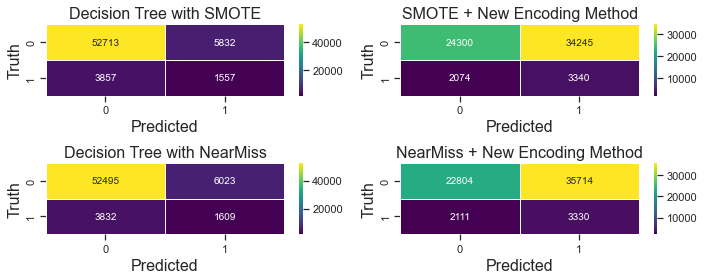

In [101]:
%matplotlib inline
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm_dt_smote = confusion_matrix(y_test,y_pred_dt_smote) # confusion matrix
cm_dt_nearmiss = confusion_matrix(y_test,y_pred_dt_nearmiss) # confusion matrix
cm_dt_smote_new = confusion_matrix(y_test_new,y_pred_dt_smote_new) # confusion matrix
cm_dt_nearmiss_new = confusion_matrix(y_test_new,y_pred_dt_nearmiss_new) # confusion matrix

def plot_confusion_matrix(ax, cm, title='Confusion matrix', cmap='viridis'):
    sn.heatmap(cm, annot=True, linewidths=0.8, fmt='d', cmap=cmap, ax=ax)
    ax.set_xlabel('Predicted',fontsize=16)
    ax.set_ylabel('Truth',fontsize=16)
    ax.set_title(title,fontsize=16)

fig, axs = plt.subplots(2,2, figsize=(10,4))

plot_confusion_matrix(axs[0,0], cm_dt_smote, title='Decision Tree with SMOTE')
plot_confusion_matrix(axs[0,1], cm_dt_nearmiss, title='SMOTE + New Encoding Method')
plot_confusion_matrix(axs[1,0], cm_dt_smote_new, title='Decision Tree with NearMiss')
plot_confusion_matrix(axs[1,1], cm_dt_nearmiss_new, title='NearMiss + New Encoding Method')

plt.tight_layout()
plt.show()

In [102]:
from sklearn.metrics import roc_curve, auc

def plot_roc_auc(ax, model_cv, X_test, y_test, label):
    #ROC-AUC
    #predict Probabilities
    y_score_model = model_cv.predict_proba(X_test) # results are probabilities for each sample for each class
    yes_probs = y_score_model[:,1] # retrieve the probabilities only for the class1 (yes, positve class)

    # calculate the features of ROC curve
    fpr_model, tpr_model, _ = roc_curve(y_test, yes_probs) # false positive, true posistive, threshold

    # AUC
    auc_model = auc(fpr_model, tpr_model)

    # plot "No-Skill" on ROC Curve
    ax.plot([0,1],[0,1], linestyle='--', label='No Skill')

    # Plot the ROC Curve
    label = f'{label} (auc={auc_model:.3f})'
    ax.plot(fpr_model, tpr_model, marker='_', label=label, color='red')

    # X-axis label
    ax.set_xlabel("False Positive Rate")

    # Y-axis label
    ax.set_ylabel("True Positive Rate")

    # show the legend
    ax.legend()

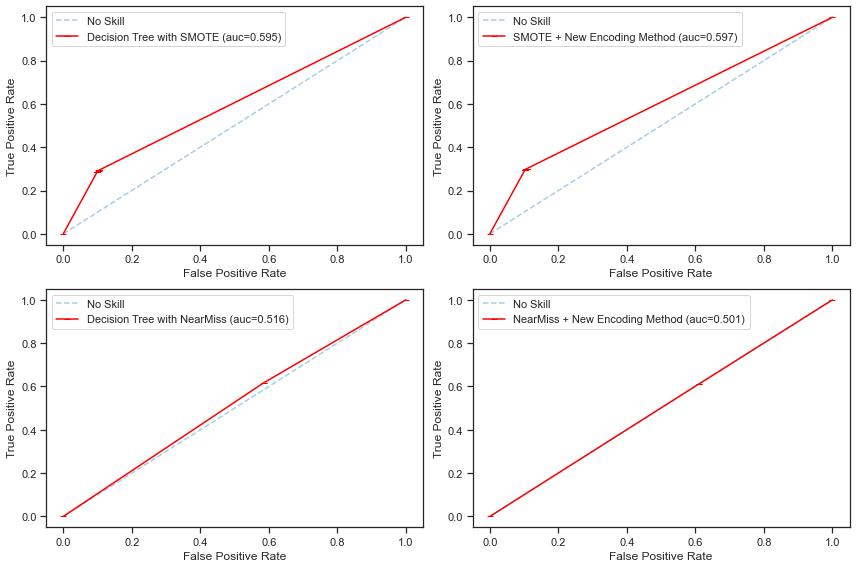

In [103]:
# plot_roc_auc(model_dt_cv, X_test, y_test, label='Decision Tree')

fig, axs = plt.subplots(2,2, figsize=(12,8))

plot_roc_auc(axs[0,0], model_dt_cv_smote, X_test, y_test, label='Decision Tree with SMOTE')
plot_roc_auc(axs[0,1], model_dt_cv_smote_new, X_test_new, y_test_new, label='SMOTE + New Encoding Method')
plot_roc_auc(axs[1,0], model_dt_cv_nearmiss, X_test, y_test, label='Decision Tree with NearMiss')
plot_roc_auc(axs[1,1], model_dt_cv_nearmiss_new, X_test_new, y_test_new, label='NearMiss + New Encoding Method')

plt.tight_layout()
plt.show()

In [104]:
# make the model and parameters
def ada_model():
    model_ada = AdaBoostClassifier()
    params_ada = {'n_estimators':[50], 'learning_rate':[1]}
    model_ada_cv = GridSearchCV(model_ada,
                                param_grid = params_ada,
                                cv = cv,
                                verbose = 1)
    return model_ada_cv

In [105]:
# fit the model with the best hyperparameters using SMOTE
model_ada_cv_smote = ada_model()
model_ada_cv_smote.fit(X_train_smote ,y_train_smote)
print("Best Hyper Parameters for SMOTE: ", model_ada_cv_smote.best_params_)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Best Hyper Parameters for SMOTE:  {'learning_rate': 1, 'n_estimators': 50}


In [106]:
# fit the model with the best hyperparameters using SMOTE New encoding method
model_ada_cv_smote_new = ada_model()
model_ada_cv_smote_new.fit(X_train_smote_new ,y_train_smote_new)
print("Best Hyper Parameters for SMOTE2: ", model_ada_cv_smote_new.best_params_)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Best Hyper Parameters for SMOTE2:  {'learning_rate': 1, 'n_estimators': 50}


In [107]:
# fit the model with the best hyperparameters using NearMiss
model_ada_cv_nearmiss = ada_model()
model_ada_cv_nearmiss.fit(X_train_nearmiss ,y_train_nearmiss)
print("Best Hyper Parameters for NearMiss: ", model_ada_cv_nearmiss.best_params_)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Best Hyper Parameters for NearMiss:  {'learning_rate': 1, 'n_estimators': 50}


In [108]:
# fit the model with the best hyperparameters using NearMiss New encoding method
model_ada_cv_nearmiss_new = ada_model()
model_ada_cv_nearmiss_new.fit(X_train_nearmiss_new ,y_train_nearmiss_new)
print("Best Hyper Parameters for NearMiss2: ", model_ada_cv_nearmiss_new.best_params_)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Best Hyper Parameters for NearMiss2:  {'learning_rate': 1, 'n_estimators': 50}


In [109]:
# print the best score (SMOTE)
y_pred_ada_smote = model_ada_cv_smote.predict(X_test)
print("Classification Report for SMOTE: \n", classification_report(y_test, y_pred_ada_smote))

Classification Report for SMOTE: 
               precision    recall  f1-score   support

           0       0.96      0.85      0.90     58545
           1       0.26      0.59      0.36      5414

    accuracy                           0.82     63959
   macro avg       0.61      0.72      0.63     63959
weighted avg       0.90      0.82      0.85     63959



In [110]:
# print the best score (SMOTE)
y_pred_ada_smote = model_ada_cv_smote.predict(X_test)
print("Classification Report for SMOTE: \n", classification_report(y_test, y_pred_ada_smote))

Classification Report for SMOTE: 
               precision    recall  f1-score   support

           0       0.96      0.85      0.90     58545
           1       0.26      0.59      0.36      5414

    accuracy                           0.82     63959
   macro avg       0.61      0.72      0.63     63959
weighted avg       0.90      0.82      0.85     63959



In [111]:
# print the best score (SMOTE New encoding method)
y_pred_ada_smote_new = model_ada_cv_smote_new.predict(X_test_new)
print("Classification Report for SMOTE2: \n", classification_report(y_test_new, y_pred_ada_smote_new))

Classification Report for SMOTE2: 
               precision    recall  f1-score   support

           0       0.96      0.83      0.89     58518
           1       0.26      0.62      0.36      5441

    accuracy                           0.82     63959
   macro avg       0.61      0.73      0.63     63959
weighted avg       0.90      0.82      0.85     63959



In [112]:
# print the best score (NearMiss)
y_pred_ada_nearmiss = model_ada_cv_nearmiss.predict(X_test)
print("Classification Report for NearMiss: \n", classification_report(y_test, y_pred_ada_nearmiss))

Classification Report for NearMiss: 
               precision    recall  f1-score   support

           0       0.95      0.54      0.69     58545
           1       0.12      0.67      0.20      5414

    accuracy                           0.55     63959
   macro avg       0.53      0.60      0.44     63959
weighted avg       0.88      0.55      0.65     63959



In [113]:
# print the best score (NearMiss New encoding method)
y_pred_ada_nearmiss_new = model_ada_cv_nearmiss_new.predict(X_test_new)
print("Classification Report for NearMiss2: \n", classification_report(y_test_new, y_pred_ada_nearmiss_new))

Classification Report for NearMiss2: 
               precision    recall  f1-score   support

           0       0.94      0.52      0.67     58518
           1       0.11      0.65      0.19      5441

    accuracy                           0.54     63959
   macro avg       0.53      0.59      0.43     63959
weighted avg       0.87      0.54      0.63     63959



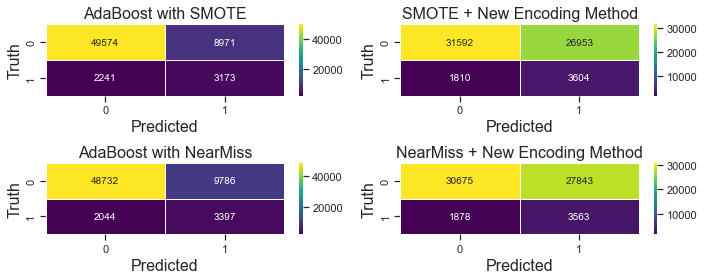

In [114]:
%matplotlib inline
cm_ada_smote = confusion_matrix(y_test, y_pred_ada_smote)
cm_ada_nearmiss = confusion_matrix(y_test, y_pred_ada_nearmiss)
cm_ada_smote_new = confusion_matrix(y_test_new, y_pred_ada_smote_new)
cm_ada_nearmiss_new = confusion_matrix(y_test_new, y_pred_ada_nearmiss_new)

fig, axs = plt.subplots(2,2, figsize=(10,4))

plot_confusion_matrix(axs[0,0], cm_ada_smote, title='AdaBoost with SMOTE')
plot_confusion_matrix(axs[0,1], cm_ada_nearmiss, title='SMOTE + New Encoding Method')
plot_confusion_matrix(axs[1,0], cm_ada_smote_new, title='AdaBoost with NearMiss')
plot_confusion_matrix(axs[1,1], cm_ada_nearmiss_new, title='NearMiss + New Encoding Method')

plt.tight_layout()
plt.show()

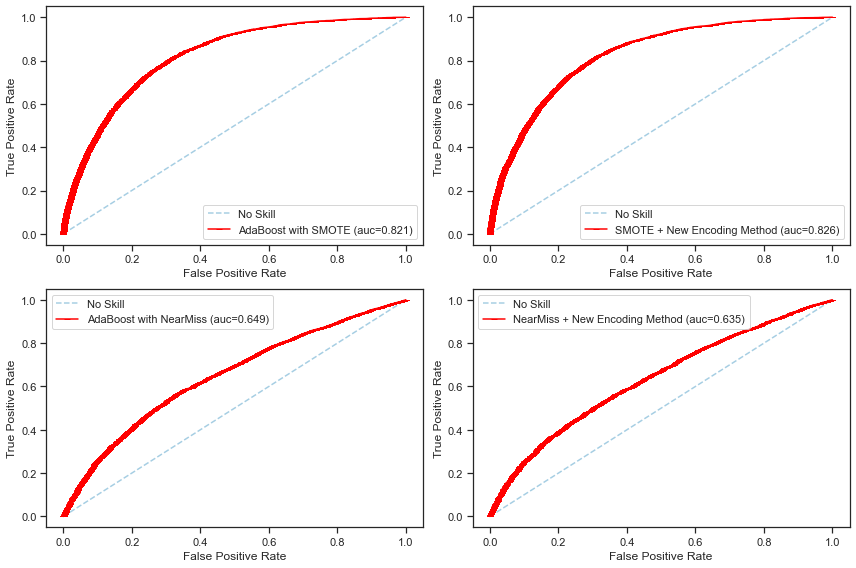

In [115]:
# plot_roc_auc(model_ada_cv, X_test, y_test, label='AdaBoost')

fig, axs = plt.subplots(2,2, figsize=(12,8))

plot_roc_auc(axs[0,0], model_ada_cv_smote, X_test, y_test, label='AdaBoost with SMOTE')
plot_roc_auc(axs[0,1], model_ada_cv_smote_new, X_test_new, y_test_new, label='SMOTE + New Encoding Method')
plot_roc_auc(axs[1,0], model_ada_cv_nearmiss, X_test, y_test, label='AdaBoost with NearMiss')
plot_roc_auc(axs[1,1], model_ada_cv_nearmiss_new, X_test_new, y_test_new, label='NearMiss + New Encoding Method')

plt.tight_layout()
plt.show()

In [116]:
# make the model and parameters
def rf_model():
    model_rf = RandomForestClassifier()
    params_rf = {"criterion":['gini','entropy']}
    model_rf_cv = GridSearchCV(model_rf,
                            param_grid = params_rf,
                            cv = cv,
                            verbose = 1)
    return model_rf_cv

In [117]:
# fit the model with the best hyperparameters using SMOTE
model_rf_cv_smote = rf_model()
model_rf_cv_smote.fit(X_train_smote ,y_train_smote)
print("Best Hyper Parameters for SMOTE: ", model_rf_cv_smote.best_params_)

Fitting 10 folds for each of 2 candidates, totalling 20 fits
Best Hyper Parameters for SMOTE:  {'criterion': 'entropy'}


In [118]:
# fit the model with the best hyperparameters using SMOTE New encoding method
model_rf_cv_smote_new = rf_model()
model_rf_cv_smote_new.fit(X_train_smote_new ,y_train_smote_new)
print("Best Hyper Parameters for SMOTE2: ", model_rf_cv_smote_new.best_params_)

Fitting 10 folds for each of 2 candidates, totalling 20 fits
Best Hyper Parameters for SMOTE2:  {'criterion': 'entropy'}


In [119]:
# fit the model with the best hyperparameters using NearMiss
model_rf_cv_nearmiss = rf_model()
model_rf_cv_nearmiss.fit(X_train_nearmiss ,y_train_nearmiss)
print("Best Hyper Parameters for NearMiss: ", model_rf_cv_nearmiss.best_params_)

Fitting 10 folds for each of 2 candidates, totalling 20 fits
Best Hyper Parameters for NearMiss:  {'criterion': 'gini'}


In [120]:
# fit the model with the best hyperparameters using NearMiss New encoding method
model_rf_cv_nearmiss_new = rf_model()
model_rf_cv_nearmiss_new.fit(X_train_nearmiss_new ,y_train_nearmiss_new)
print("Best Hyper Parameters for NearMiss2: ", model_rf_cv_nearmiss_new.best_params_)

Fitting 10 folds for each of 2 candidates, totalling 20 fits
Best Hyper Parameters for NearMiss2:  {'criterion': 'entropy'}


In [121]:
# print the best score (SMOTE)
y_pred_rf_smote = model_rf_cv_smote.predict(X_test)
print("Classification Report for SMOTE: \n", classification_report(y_test, y_pred_rf_smote))

Classification Report for SMOTE: 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93     58545
           1       0.27      0.27      0.27      5414

    accuracy                           0.88     63959
   macro avg       0.60      0.60      0.60     63959
weighted avg       0.88      0.88      0.88     63959



In [122]:
# print the best score (SMOTE New encoding method)
y_pred_rf_smote_new = model_rf_cv_smote_new.predict(X_test_new)
print("Classification Report for SMOTE2: \n", classification_report(y_test_new, y_pred_rf_smote_new))

Classification Report for SMOTE2: 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93     58518
           1       0.27      0.25      0.26      5441

    accuracy                           0.88     63959
   macro avg       0.60      0.59      0.60     63959
weighted avg       0.87      0.88      0.88     63959



In [123]:
# print the best score (NearMiss)
y_pred_rf_nearmiss = model_rf_cv_nearmiss.predict(X_test)
print("Classification Report for NearMiss: \n", classification_report(y_test, y_pred_rf_nearmiss))

Classification Report for NearMiss: 
               precision    recall  f1-score   support

           0       0.92      0.47      0.63     58545
           1       0.09      0.57      0.16      5414

    accuracy                           0.48     63959
   macro avg       0.51      0.52      0.39     63959
weighted avg       0.85      0.48      0.59     63959



In [124]:
# print the best score (NearMiss New encoding method)
y_pred_rf_nearmiss_new = model_rf_cv_nearmiss_new.predict(X_test_new)
print("Classification Report for NearMiss2: \n", classification_report(y_test_new, y_pred_rf_nearmiss_new))

Classification Report for NearMiss2: 
               precision    recall  f1-score   support

           0       0.92      0.46      0.61     58518
           1       0.09      0.57      0.15      5441

    accuracy                           0.47     63959
   macro avg       0.50      0.51      0.38     63959
weighted avg       0.85      0.47      0.57     63959



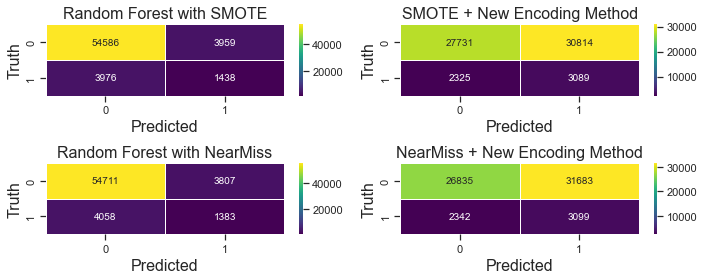

In [125]:
%matplotlib inline
cm_rf_smote = confusion_matrix(y_test, y_pred_rf_smote)
cm_rf_nearmiss = confusion_matrix(y_test, y_pred_rf_nearmiss)
cm_rf_smote_new = confusion_matrix(y_test_new, y_pred_rf_smote_new)
cm_rf_nearmiss_new = confusion_matrix(y_test_new, y_pred_rf_nearmiss_new)

fig, axs = plt.subplots(2,2, figsize=(10,4))

plot_confusion_matrix(axs[0,0], cm_rf_smote, title='Random Forest with SMOTE')
plot_confusion_matrix(axs[0,1], cm_rf_nearmiss, title='SMOTE + New Encoding Method')
plot_confusion_matrix(axs[1,0], cm_rf_smote_new, title='Random Forest with NearMiss')
plot_confusion_matrix(axs[1,1], cm_rf_nearmiss_new, title='NearMiss + New Encoding Method')

plt.tight_layout()
plt.show()

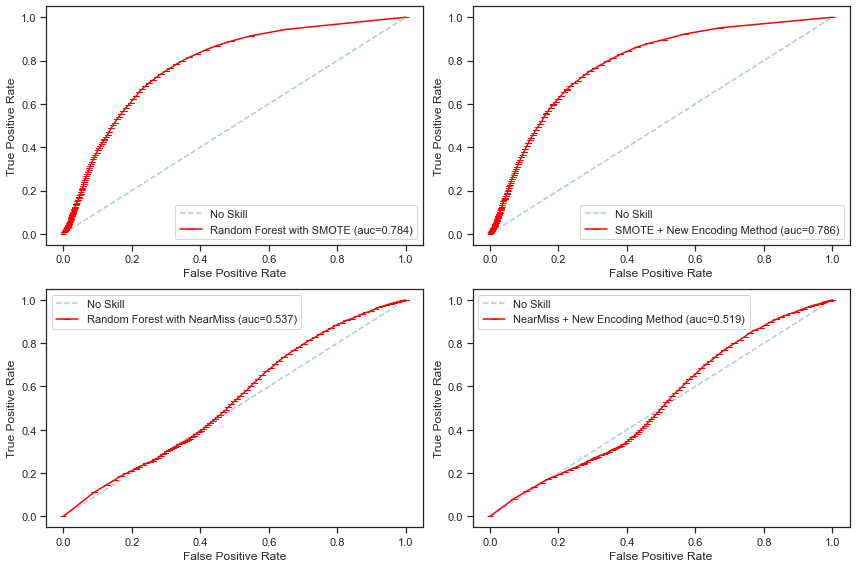

In [126]:
# plot_roc_auc(model_rf_cv, X_test, y_test, label='Random Forest')

fig, axs = plt.subplots(2,2, figsize=(12,8))

plot_roc_auc(axs[0,0], model_rf_cv_smote, X_test, y_test, label='Random Forest with SMOTE')
plot_roc_auc(axs[0,1], model_rf_cv_smote_new, X_test_new, y_test_new, label='SMOTE + New Encoding Method')
plot_roc_auc(axs[1,0], model_rf_cv_nearmiss, X_test, y_test, label='Random Forest with NearMiss')
plot_roc_auc(axs[1,1], model_rf_cv_nearmiss_new, X_test_new, y_test_new, label='NearMiss + New Encoding Method')

plt.tight_layout()
plt.show()


In [127]:
# make the model and parameters
def nb_model():
    model_nb = GaussianNB()
    params_nb = {'var_smoothing': np.logspace(1,10, num=100)}
    model_nb_cv = GridSearchCV(model_nb,
                            param_grid = params_nb,
                            cv = cv,
                            verbose = 1)
    return model_nb_cv

In [128]:
# fit the model with the best hyperparameters using SMOTE
model_nb_cv_smote = nb_model()
model_nb_cv_smote.fit(X_train_smote ,y_train_smote)
print("Best Hyper Parameters for SMOTE: ", model_nb_cv_smote.best_params_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best Hyper Parameters for SMOTE:  {'var_smoothing': 10.0}


In [129]:
# fit the model with the best hyperparameters using SMOTE New encoding method
model_nb_cv_smote_new = nb_model()
model_nb_cv_smote_new.fit(X_train_smote_new ,y_train_smote_new)
print("Best Hyper Parameters for SMOTE2: ", model_nb_cv_smote_new.best_params_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best Hyper Parameters for SMOTE2:  {'var_smoothing': 10.0}


In [130]:
# fit the model with the best hyperparameters using NearMiss
model_nb_cv_nearmiss = nb_model()
model_nb_cv_nearmiss.fit(X_train_nearmiss ,y_train_nearmiss)
print("Best Hyper Parameters for NearMiss: ", model_nb_cv_nearmiss.best_params_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best Hyper Parameters for NearMiss:  {'var_smoothing': 10.0}


In [131]:
# fit the model with the best hyperparameters using NearMiss New encoding method
model_nb_cv_nearmiss_new = nb_model()
model_nb_cv_nearmiss_new.fit(X_train_nearmiss_new ,y_train_nearmiss_new)
print("Best Hyper Parameters for NearMiss2: ", model_nb_cv_nearmiss_new.best_params_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best Hyper Parameters for NearMiss2:  {'var_smoothing': 10.0}


In [132]:
# print the best score (SMOTE)
y_pred_nb_smote = model_nb_cv_smote.predict(X_test)
print("Classification Report for SMOTE: \n", classification_report(y_test, y_pred_nb_smote))

Classification Report for SMOTE: 
               precision    recall  f1-score   support

           0       0.94      0.95      0.94     58545
           1       0.35      0.32      0.33      5414

    accuracy                           0.89     63959
   macro avg       0.64      0.63      0.64     63959
weighted avg       0.89      0.89      0.89     63959



In [133]:
# print the best score (SMOTE New encoding method)
y_pred_nb_smote_new = model_nb_cv_smote_new.predict(X_test_new)
print("Classification Report for SMOTE2: \n", classification_report(y_test_new, y_pred_nb_smote_new))

Classification Report for SMOTE2: 
               precision    recall  f1-score   support

           0       0.94      0.92      0.93     58518
           1       0.33      0.40      0.36      5441

    accuracy                           0.88     63959
   macro avg       0.64      0.66      0.65     63959
weighted avg       0.89      0.88      0.88     63959



In [134]:
# print the best score (NearMiss)
y_pred_nb_nearmiss = model_nb_cv_nearmiss.predict(X_test)
print("Classification Report for NearMiss: \n", classification_report(y_test, y_pred_nb_nearmiss))

Classification Report for NearMiss: 
               precision    recall  f1-score   support

           0       0.76      0.01      0.01     58545
           1       0.08      0.98      0.15      5414

    accuracy                           0.09     63959
   macro avg       0.42      0.49      0.08     63959
weighted avg       0.70      0.09      0.02     63959



In [135]:
# print the best score (NearMiss New encoding method)
y_pred_nb_nearmiss_new = model_nb_cv_nearmiss_new.predict(X_test_new)
print("Classification Report for NearMiss2: \n", classification_report(y_test_new, y_pred_nb_nearmiss_new))

Classification Report for NearMiss2: 
               precision    recall  f1-score   support

           0       0.76      0.00      0.01     58518
           1       0.08      0.98      0.16      5441

    accuracy                           0.09     63959
   macro avg       0.42      0.49      0.08     63959
weighted avg       0.70      0.09      0.02     63959



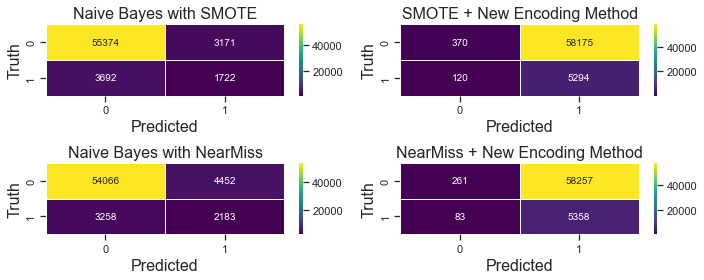

In [136]:
%matplotlib inline
cm_nb_smote = confusion_matrix(y_test, y_pred_nb_smote)
cm_nb_nearmiss = confusion_matrix(y_test, y_pred_nb_nearmiss)
cm_nb_smote_new = confusion_matrix(y_test_new, y_pred_nb_smote_new)
cm_nb_nearmiss_new = confusion_matrix(y_test_new, y_pred_nb_nearmiss_new)

fig, axs = plt.subplots(2,2, figsize=(10,4))

plot_confusion_matrix(axs[0,0], cm_nb_smote, title='Naive Bayes with SMOTE')
plot_confusion_matrix(axs[0,1], cm_nb_nearmiss, title='SMOTE + New Encoding Method')
plot_confusion_matrix(axs[1,0], cm_nb_smote_new, title='Naive Bayes with NearMiss')
plot_confusion_matrix(axs[1,1], cm_nb_nearmiss_new, title='NearMiss + New Encoding Method')

plt.tight_layout()
plt.show()

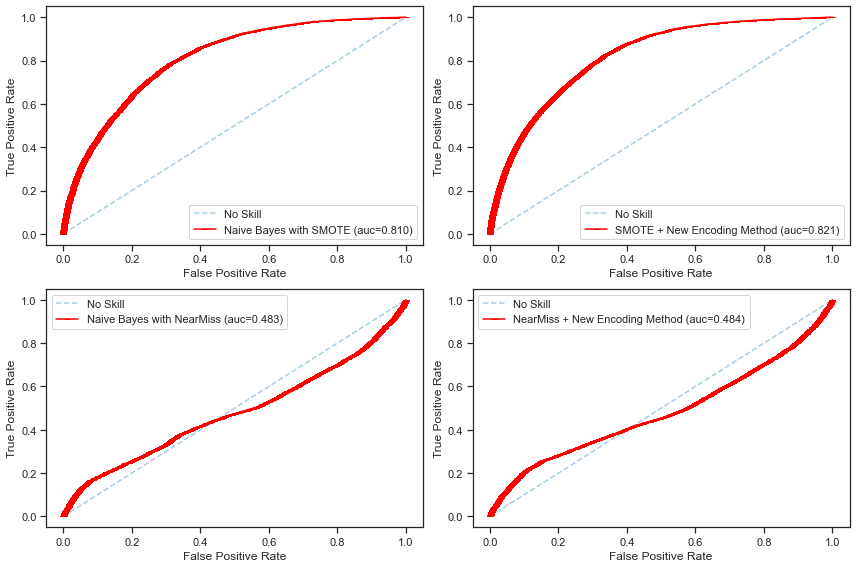

In [137]:
# plot_roc_auc(model_nb_cv, X_test, y_test, label='Naive Bayes')

fig, axs = plt.subplots(2,2, figsize=(12,8))

plot_roc_auc(axs[0,0], model_nb_cv_smote, X_test, y_test, label='Naive Bayes with SMOTE')
plot_roc_auc(axs[0,1], model_nb_cv_smote_new, X_test_new, y_test_new, label='SMOTE + New Encoding Method')
plot_roc_auc(axs[1,0], model_nb_cv_nearmiss, X_test, y_test, label='Naive Bayes with NearMiss')
plot_roc_auc(axs[1,1], model_nb_cv_nearmiss_new, X_test_new, y_test_new, label='NearMiss + New Encoding Method')

plt.tight_layout()
plt.show()

In [138]:
# make the model and parameters
def knn_model():
    model_knn = KNeighborsClassifier()
    params_knn = {'algorithm':['auto'], 'n_neighbors': range(1,4)}
    model_knn_cv = GridSearchCV(model_knn,
                            param_grid = params_knn,
                            cv = cv,
                            verbose = 1)
    return model_knn_cv

In [139]:
# fit the model with the best hyperparameters using SMOTE
model_knn_cv_smote = knn_model()
model_knn_cv_smote.fit(X_train_smote ,y_train_smote)
print("Best Hyper Parameters for SMOTE: ", model_knn_cv_smote.best_params_)

Fitting 10 folds for each of 3 candidates, totalling 30 fits
Best Hyper Parameters for SMOTE:  {'algorithm': 'auto', 'n_neighbors': 1}


In [140]:
# fit the model with the best hyperparameters using SMOTE New encoding method
model_knn_cv_smote_new = knn_model()
model_knn_cv_smote_new.fit(X_train_smote_new ,y_train_smote_new)
print("Best Hyper Parameters for SMOTE2: ", model_knn_cv_smote_new.best_params_)

Fitting 10 folds for each of 3 candidates, totalling 30 fits
Best Hyper Parameters for SMOTE2:  {'algorithm': 'auto', 'n_neighbors': 1}


In [141]:
# fit the model with the best hyperparameters using NearMiss
model_knn_cv_nearmiss = knn_model()
model_knn_cv_nearmiss.fit(X_train_nearmiss ,y_train_nearmiss)
print("Best Hyper Parameters for NearMiss: ", model_knn_cv_nearmiss.best_params_)

Fitting 10 folds for each of 3 candidates, totalling 30 fits
Best Hyper Parameters for NearMiss:  {'algorithm': 'auto', 'n_neighbors': 2}


In [142]:
# fit the model with the best hyperparameters using NearMiss New encoding method
model_knn_cv_nearmiss_new = knn_model()
model_knn_cv_nearmiss_new.fit(X_train_nearmiss_new ,y_train_nearmiss_new)
print("Best Hyper Parameters for NearMiss2: ", model_knn_cv_nearmiss_new.best_params_)

Fitting 10 folds for each of 3 candidates, totalling 30 fits
Best Hyper Parameters for NearMiss2:  {'algorithm': 'auto', 'n_neighbors': 2}


In [143]:
# print the best score (SMOTE)
y_pred_knn_smote = model_knn_cv_smote.predict(X_test)
print("Classification Report for SMOTE: \n", classification_report(y_test, y_pred_knn_smote))

Classification Report for SMOTE: 
               precision    recall  f1-score   support

           0       0.94      0.89      0.91     58545
           1       0.22      0.34      0.27      5414

    accuracy                           0.84     63959
   macro avg       0.58      0.61      0.59     63959
weighted avg       0.87      0.84      0.86     63959



In [144]:
# print the best score (SMOTE New encoding method)
y_pred_knn_smote_new = model_knn_cv_smote_new.predict(X_test_new)
print("Classification Report for SMOTE2: \n", classification_report(y_test_new, y_pred_knn_smote_new))

Classification Report for SMOTE2: 
               precision    recall  f1-score   support

           0       0.94      0.89      0.91     58518
           1       0.22      0.35      0.27      5441

    accuracy                           0.84     63959
   macro avg       0.58      0.62      0.59     63959
weighted avg       0.88      0.84      0.86     63959



In [145]:
# print the best score (NearMiss)
y_pred_knn_nearmiss = model_knn_cv_nearmiss.predict(X_test)
print("Classification Report for NearMiss: \n", classification_report(y_test, y_pred_knn_nearmiss))

Classification Report for NearMiss: 
               precision    recall  f1-score   support

           0       0.92      0.54      0.68     58545
           1       0.09      0.48      0.15      5414

    accuracy                           0.54     63959
   macro avg       0.50      0.51      0.42     63959
weighted avg       0.85      0.54      0.64     63959



In [146]:
# print the best score (NearMiss New encoding method)
y_pred_knn_nearmiss_new = model_knn_cv_nearmiss_new.predict(X_test_new)
print("Classification Report for NearMiss2: \n", classification_report(y_test_new, y_pred_knn_nearmiss_new))

Classification Report for NearMiss2: 
               precision    recall  f1-score   support

           0       0.91      0.50      0.65     58518
           1       0.08      0.47      0.14      5441

    accuracy                           0.50     63959
   macro avg       0.50      0.49      0.39     63959
weighted avg       0.84      0.50      0.60     63959



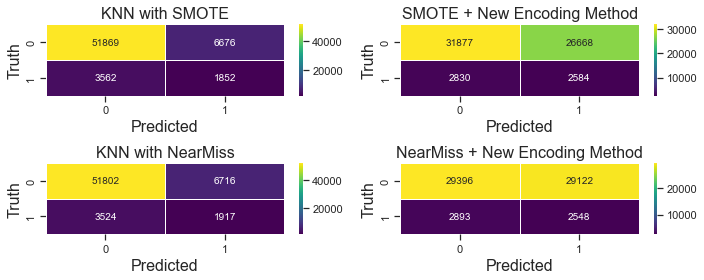

In [147]:
%matplotlib inline
cm_knn_smote = confusion_matrix(y_test, y_pred_knn_smote)
cm_knn_nearmiss = confusion_matrix(y_test, y_pred_knn_nearmiss)
cm_knn_smote_new = confusion_matrix(y_test_new, y_pred_knn_smote_new)
cm_knn_nearmiss_new = confusion_matrix(y_test_new, y_pred_knn_nearmiss_new)

fig, axs = plt.subplots(2,2, figsize=(10,4))

plot_confusion_matrix(axs[0,0], cm_knn_smote, title='KNN with SMOTE')
plot_confusion_matrix(axs[0,1], cm_knn_nearmiss, title='SMOTE + New Encoding Method')
plot_confusion_matrix(axs[1,0], cm_knn_smote_new, title='KNN with NearMiss')
plot_confusion_matrix(axs[1,1], cm_knn_nearmiss_new, title='NearMiss + New Encoding Method')

plt.tight_layout()
plt.show()

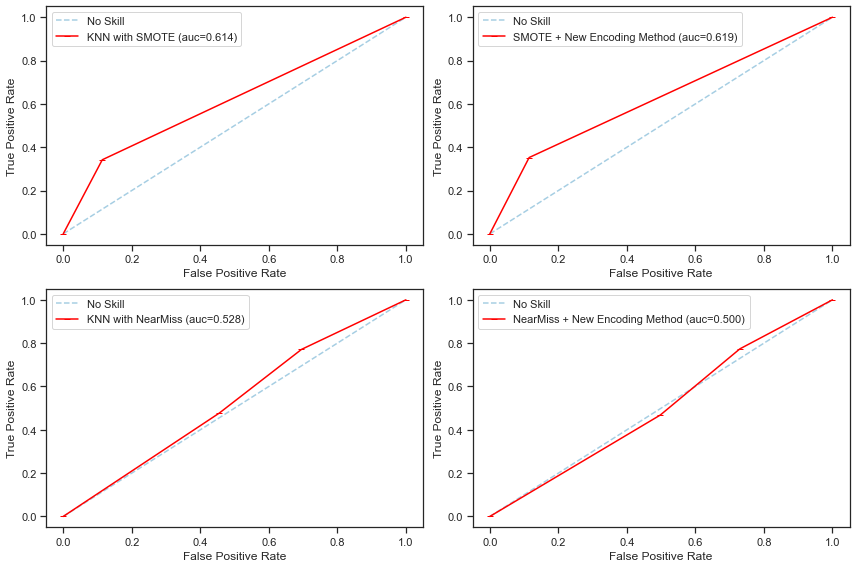

In [148]:
# plot_roc_auc(model_knn_cv, X_test, y_test, label='KNN')

fig, axs = plt.subplots(2,2, figsize=(12,8))

plot_roc_auc(axs[0,0], model_knn_cv_smote, X_test, y_test, label='KNN with SMOTE')
plot_roc_auc(axs[0,1], model_knn_cv_smote_new, X_test_new, y_test_new, label='SMOTE + New Encoding Method')
plot_roc_auc(axs[1,0], model_knn_cv_nearmiss, X_test, y_test, label='KNN with NearMiss')
plot_roc_auc(axs[1,1], model_knn_cv_nearmiss_new, X_test_new, y_test_new, label='NearMiss + New Encoding Method')

plt.tight_layout()
plt.show()

In [149]:
# make the model and parameters
def per_model():
    model_per = Perceptron()
    params_per = {'tol':[0.0001], 'random_state': [2]}
    model_per_cv = GridSearchCV(model_per,
                            param_grid = params_per,
                            cv = cv,
                            refit = True,
                            verbose = 1)
    return model_per_cv

In [150]:
# fit the model with the best hyperparameters using SMOTE
model_per_cv_smote = per_model()
model_per_cv_smote.fit(X_train_smote ,y_train_smote)
print("Best Hyper Parameters for SMOTE: ", model_per_cv_smote.best_params_)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Best Hyper Parameters for SMOTE:  {'random_state': 2, 'tol': 0.0001}


In [151]:
# fit the model with the best hyperparameters using SMOTE New encoding method
model_per_cv_smote_new = per_model()
model_per_cv_smote_new.fit(X_train_smote_new ,y_train_smote_new)
print("Best Hyper Parameters for SMOTE2: ", model_per_cv_smote_new.best_params_)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Best Hyper Parameters for SMOTE2:  {'random_state': 2, 'tol': 0.0001}


In [152]:
# fit the model with the best hyperparameters using NearMiss
model_per_cv_nearmiss = per_model()
model_per_cv_nearmiss.fit(X_train_nearmiss ,y_train_nearmiss)
print("Best Hyper Parameters for NearMiss: ", model_per_cv_nearmiss.best_params_)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Best Hyper Parameters for NearMiss:  {'random_state': 2, 'tol': 0.0001}


In [153]:
# fit the model with the best hyperparameters using NearMiss New encoding method
model_per_cv_nearmiss_new = per_model()
model_per_cv_nearmiss_new.fit(X_train_nearmiss_new ,y_train_nearmiss_new)
print("Best Hyper Parameters for NearMiss2: ", model_per_cv_nearmiss_new.best_params_)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Best Hyper Parameters for NearMiss2:  {'random_state': 2, 'tol': 0.0001}


In [154]:
# print the best score (SMOTE)
y_pred_per_smote = model_per_cv_smote.predict(X_test)
print("Classification Report for SMOTE: \n", classification_report(y_test, y_pred_per_smote))

Classification Report for SMOTE: 
               precision    recall  f1-score   support

           0       0.97      0.61      0.75     58545
           1       0.15      0.78      0.26      5414

    accuracy                           0.62     63959
   macro avg       0.56      0.69      0.50     63959
weighted avg       0.90      0.62      0.70     63959



In [155]:
# print the best score (SMOTE New encoding method)
y_pred_per_smote_new = model_per_cv_smote_new.predict(X_test_new)
print("Classification Report for SMOTE2: \n", classification_report(y_test_new, y_pred_per_smote_new))

Classification Report for SMOTE2: 
               precision    recall  f1-score   support

           0       0.96      0.70      0.81     58518
           1       0.17      0.65      0.27      5441

    accuracy                           0.70     63959
   macro avg       0.56      0.68      0.54     63959
weighted avg       0.89      0.70      0.76     63959



In [156]:
# print the best score (NearMiss)
y_pred_per_nearmiss = model_per_cv_nearmiss.predict(X_test)
print("Classification Report for NearMiss: \n", classification_report(y_test, y_pred_per_nearmiss))

Classification Report for NearMiss: 
               precision    recall  f1-score   support

           0       0.93      0.42      0.58     58545
           1       0.10      0.66      0.17      5414

    accuracy                           0.44     63959
   macro avg       0.51      0.54      0.37     63959
weighted avg       0.86      0.44      0.54     63959



In [157]:
# print the best score (NearMiss New encoding method)
y_pred_per_nearmiss_new = model_per_cv_nearmiss_new.predict(X_test_new)
print("Classification Report for NearMiss2: \n", classification_report(y_test_new, y_pred_per_nearmiss_new))

Classification Report for NearMiss2: 
               precision    recall  f1-score   support

           0       0.93      0.57      0.71     58518
           1       0.10      0.51      0.17      5441

    accuracy                           0.57     63959
   macro avg       0.51      0.54      0.44     63959
weighted avg       0.86      0.57      0.66     63959



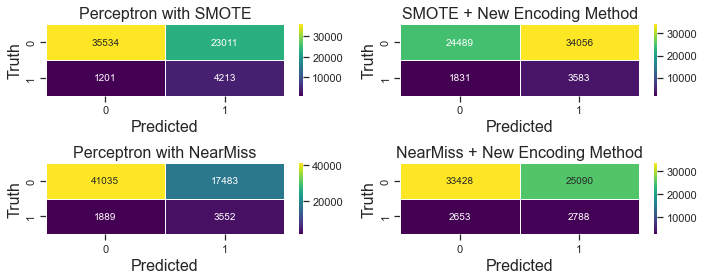

In [158]:
%matplotlib inline
cm_per_smote = confusion_matrix(y_test, y_pred_per_smote)
cm_per_nearmiss = confusion_matrix(y_test, y_pred_per_nearmiss)
cm_per_smote_new = confusion_matrix(y_test_new, y_pred_per_smote_new)
cm_per_nearmiss_new = confusion_matrix(y_test_new, y_pred_per_nearmiss_new)

fig, axs = plt.subplots(2,2, figsize=(10,4))

plot_confusion_matrix(axs[0,0], cm_per_smote, title='Perceptron with SMOTE')
plot_confusion_matrix(axs[0,1], cm_per_nearmiss, title='SMOTE + New Encoding Method')
plot_confusion_matrix(axs[1,0], cm_per_smote_new, title='Perceptron with NearMiss')
plot_confusion_matrix(axs[1,1], cm_per_nearmiss_new, title='NearMiss + New Encoding Method')

plt.tight_layout()
plt.show()